In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
'''Sample dataset'''
trainSet = [[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16, 0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]]

In [3]:
class K_Means:
    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):          # constructor
        self.k = k                                                       # number of clustes
        self.max_iterations = max_iter                                   # maximum iterations
        self.tolerance = tolerance                                       # tolerance
    
    def euclidean_distance(self, point1, point2):  
        '''
        Finds euclidiean distance b/w 2 point
        sqrt((x1-x2)^2+(y1-y2)^2)
        '''
        distance = 0
        for x in range(len(point1)):
            distance += pow((point1[x] - point2[x]), 2)
        return math.sqrt(distance)

    def predict(self,data):
        '''predicts the cluster to which the data point belongs to'''
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data, selectCent = 'd'):
        self.centroids = {}
        if selectCent == 'r':                    # first k points as cluster centers initially
            for i in range(self.k):
                self.centroids[i] = data[i]
        elif selectCent == 'd':                  # default cluster centers for sample dataset
            self.centroids[0] = trainSet[0]
            self.centroids[1] = trainSet[7]
        
        
        for i in range(self.max_iterations):
            self.classes = {}                    # dictionary which contains cluster centers and the points from that cluster
            for j in range(self.k):
                self.classes[j] = []
                
            for point in data:
                distances = []
                for index in self.centroids:     # calculate the dist of each data point from each of the cluster center
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))  # get the cluster center which is closest to the data point
                self.classes[cluster_index].append(point)
            
            previous = dict(self.centroids)
            for cluster_index in self.classes:   # recalculate cluster center by taking average of the data points fo that cluster
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
            

            '''Calculate the tolerance between old cluster centers and the new ones'''    
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break

Prediction for  [0.25, 0.5]
0.2475 0.275


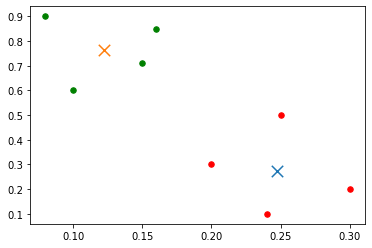

In [4]:
K=2    
k_means = K_Means(K)
k_means.fit(trainSet,'r')

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]
for centroid in k_means.centroids:
    plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

for cluster_index in k_means.classes:
    color = colors[cluster_index]
    for features in k_means.classes[cluster_index]:
        plt.scatter(features[0], features[1], color = color,s = 30)
        
k_means.predict(trainSet[5])
print('Prediction for ', trainSet[5])
print(k_means.centroids[k_means.predict(trainSet[5])][0], k_means.centroids[k_means.predict(trainSet[5])][1])

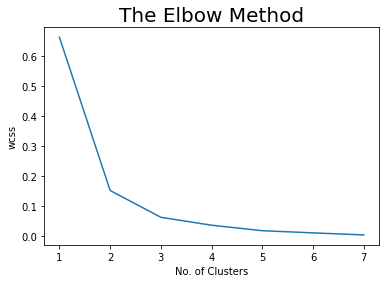

In [5]:
wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(trainSet)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

[[0.2   0.3  ]
 [0.12  0.875]
 [0.125 0.655]
 [0.25  0.5  ]
 [0.27  0.15 ]]


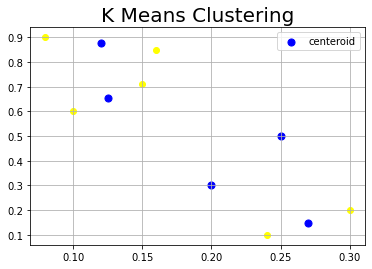

In [6]:
'''Using sklearn'''
x = pd.DataFrame(trainSet)
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

print(km.cluster_centers_)
for item in trainSet:
    plt.scatter(item[0],item[1],c='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

# plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [7]:
'''Mall customers dataset'''
data = pd.read_csv('Mall_Customers.csv')
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [8]:
x = data.iloc[:, [3, 4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

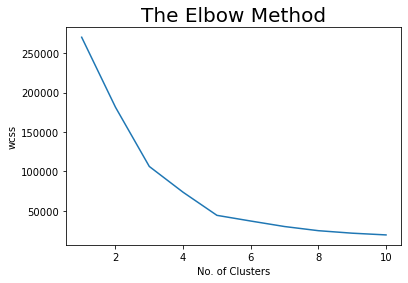

In [9]:
'''finding optimum number of clusters using elbow method'''
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

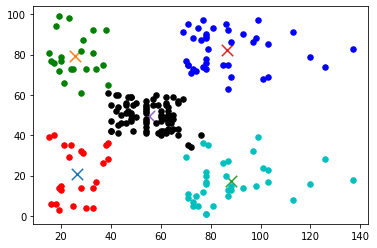

In [10]:
K=5   
k_means = K_Means(K)
k_means.fit(x,'r')
 
# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]
for centroid in k_means.centroids:
    plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

for cluster_index in k_means.classes:
    color = colors[cluster_index]
    for features in k_means.classes[cluster_index]:
        plt.scatter(features[0], features[1], color = color,s = 30)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


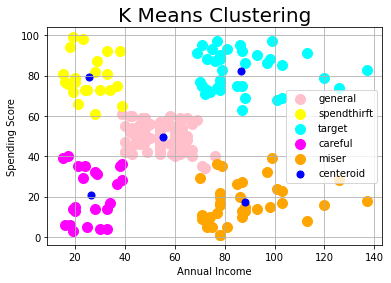

In [11]:
'''Clustering on mall dataset using sklearn'''
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# print(x[y_means == 0, 0], x[y_means == 0, 1])
print(km.cluster_centers_)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'spendthirft')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'miser')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

# plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()